# Importing Required Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test.head() #Viewing First 5 rows of training data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train.describe() 

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [4]:
train.isnull().sum().sum() #Checking if it contains any null value

0

# Preprocessing Data

In [5]:
#Training Data to numpy Array

y_train = pd.get_dummies(train['label']) #separating labels into 10 different columns (one hot enocoding)
x_train = train.drop(['label'], axis = 1) 

y_train = y_train.to_numpy().T
x_train = x_train.to_numpy().T
x_train = x_train /255 # Making all values between 0-1

print(y_train[: , 0:5])

[[0 0 0 1 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 0 0 0]]


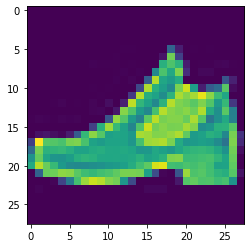

In [6]:
#Image Visualisation

image = x_train[: , 1].reshape((28, 28))
plt.imshow(image)

In [7]:
#Testing Data to numpy Array

y_test = test['label']
x_test = test.drop(['label'], axis = 1)

y_test = y_test.to_numpy().T
x_test = x_test.to_numpy().T
x_test = x_test /255

## TRAINING MODEL

In [8]:
# def parameters(pixels, labels):
#     W1 = np.random.normal(0, 1, size = (64, pixels))
#     b1 = np.random.normal(0, 1, size = (64, 1))
#     W2 = np.random.normal(0, 1, size = (labels, 64))
#     b2 = np.random.normal(0, 1, size = (labels, 1))
#     return W1, b1, W2, b2

# Initializing Parameters with random values and making features of hidden layer 64

def parameters(pixels, labels):
    W1 = np.random.rand(64, pixels) - 0.5
    b1 = np.random.rand(64, 1) - 0.5
    W2 = np.random.rand(labels, 64) - 0.5
    b2 = np.random.rand(labels, 1) - 0.5
    return W1, b1, W2, b2


# Forward Propagation

In [9]:
def relu(Z):
    return np.maximum(Z, 0) # Z for greater than 0, else 0

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z)) # returns the probability of all labels
        
def forward(X, W1, b1, W2, b2):
    Z1 = W1.dot(X) + b1
    A1 = relu(Z1)  # ReLU for hidden layer
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2) #Softmax for output layer
    return Z1, A1, Z2, A2

# Backward Propagation

In [10]:
def relu_backward(Z):
    return Z > 0

def backward(X, Y, Z1, A1, Z2, A2, W1, W2, b1, b2, alpha):
    m = X.shape[1]
    
    # Gradient of parameters
    dZ2 = A2 - Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * relu_backward(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    
    #updating the parameters
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2   
    
    return W1, b1, W2, b2

In [11]:
def flatten(A2):
    return np.argmax(A2, 0) # Taking index of maximum value across rows

def accuracy(predictions, targets):
    return np.mean(predictions == targets) # Number of values of the prediction same as given labels

In [12]:
def loss(target, predictions):
    return -np.mean(np.log(predictions[np.arange(len(target)), target])) #Cross-Entropy Loss   

# Model

In [14]:
def model(X, Y, alpha, iterations):
    pixels, samples = X.shape
    labels, _ = Y.shape
    losses = [] # Array to store loss of each iteration 
    W1, b1, W2, b2 = parameters(pixels, labels)
    
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward(X, W1, b1, W2, b2)
        W1, b1, W2, b2 = backward(X, Y,  Z1, A1, Z2, A2, W1, W2, b1, b2, alpha)
        predictions = flatten(A2)
        target = flatten(Y)
        los = loss(target.T, A2.T)
        losses.append(los)
        if i % 50 == 0:
            print(f"[================== Iteration: {i} =====================]")
            print(f"Training loss : {los : .3f}")
            print(f"Training Accuracy: {accuracy(predictions, target) : .3f}")
    return W1, b1, W2, b2, losses 

# Accuracy and Loss of Train-Set

In [15]:
W1, b1, W2, b2, losses = model(x_train, y_train, 0.9, 3000)

[================== Iteration: 0 =====================]
Training loss :  9.210
Training Accuracy:  0.091
[================== Iteration: 50 =====================]
Training loss :  1.649
Training Accuracy:  0.412
[================== Iteration: 100 =====================]
Training loss :  1.534
Training Accuracy:  0.429
[================== Iteration: 150 =====================]
Training loss :  1.200
Training Accuracy:  0.527
[================== Iteration: 200 =====================]
Training loss :  1.436
Training Accuracy:  0.464
[================== Iteration: 250 =====================]
Training loss :  1.610
Training Accuracy:  0.462
[================== Iteration: 300 =====================]
Training loss :  1.134
Training Accuracy:  0.630
[================== Iteration: 350 =====================]
Training loss :  1.265
Training Accuracy:  0.577
[================== Iteration: 400 =====================]
Training loss :  1.247
Training Accuracy:  0.628
[================== Iteration: 450 =====

# Train-Set F1 Score

In [26]:
from sklearn.metrics import confusion_matrix , classification_report

a, b, c, train_pred = forward(x_train, W1, b1, W2, b2)
pred_final = flatten(train_pred)
train_final = flatten(y_train)
print(confusion_matrix(train_final.T, pred_final.T))

[[4964   13  122   98    6    3  756    0   38    0]
 [  17 5830   24   93    8    4   19    0    4    1]
 [  39    4 5043   30  330    1  543    0   10    0]
 [ 236   55   91 5083  271    2  244    0   18    0]
 [  11   10  887  111 4124    3  841    0   13    0]
 [   0    0    0    1    0 5864    1  100   13   21]
 [ 731    9  580   62  216    2 4351    0   48    1]
 [   0    1    0    0    0   91    0 5758    9  141]
 [  14    4   42   14   16   12  103   14 5778    3]
 [   0    0    1    0    0   56    0  209    3 5731]]


In [27]:
print(classification_report(train_final.T, pred_final.T))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      6000
           1       0.98      0.97      0.98      6000
           2       0.74      0.84      0.79      6000
           3       0.93      0.85      0.88      6000
           4       0.83      0.69      0.75      6000
           5       0.97      0.98      0.97      6000
           6       0.63      0.73      0.68      6000
           7       0.95      0.96      0.95      6000
           8       0.97      0.96      0.97      6000
           9       0.97      0.96      0.96      6000

    accuracy                           0.88     60000
   macro avg       0.88      0.88      0.88     60000
weighted avg       0.88      0.88      0.88     60000



# Plotting The LOSS

<function matplotlib.pyplot.show(close=None, block=None)>

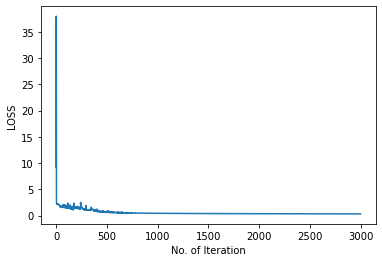

In [28]:
plt.plot(losses)
plt.xlabel("No. of Iteration")
plt.ylabel("LOSS")
plt.show

# Confusion_Matrix Plot of Train-Set

<AxesSubplot:>

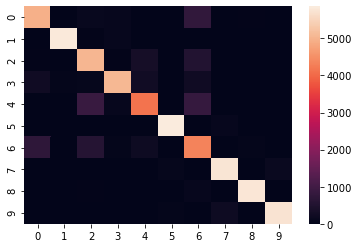

In [32]:
sns.heatmap(confusion_matrix(train_final.T, pred_final.T))

# Accuracy and Loss of Test-Set 

In [33]:
a, b, c, test_pred = forward(x_test, W1, b1, W2, b2)
test_final = flatten(test_pred)
test_acc = accuracy(test_final, y_test)
test_loss = loss(y_test.T, test_pred.T)
print(f"Test Accuracy: {test_acc : .3f}")
print(f"Test loss: {test_loss : .3f}")

Test Accuracy:  0.862
Test loss:  0.393


# Test-Set F1 Score

In [34]:
print(confusion_matrix(y_test.T, test_final.T))

[[809   4  22  18   0   1 137   1   8   0]
 [  2 979   4  11   0   1   3   0   0   0]
 [  9   1 822   5  47   1 110   0   5   0]
 [ 36  21  20 845  37   1  38   0   2   0]
 [  1   2 126  19 706   0 143   0   2   1]
 [  0   1   1   2   0 935   2  43   5  11]
 [147   2  94  11  39   1 694   0  12   0]
 [  0   0   0   0   0  28   0 931   0  41]
 [  3   0   8   3   2   3  24   5 951   1]
 [  0   0   0   1   0  16   0  38   1 944]]


In [35]:
print(classification_report(y_test.T, test_final.T))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1000
           1       0.97      0.98      0.97      1000
           2       0.75      0.82      0.78      1000
           3       0.92      0.84      0.88      1000
           4       0.85      0.71      0.77      1000
           5       0.95      0.94      0.94      1000
           6       0.60      0.69      0.65      1000
           7       0.91      0.93      0.92      1000
           8       0.96      0.95      0.96      1000
           9       0.95      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



# Confusion_Matrix Plot of Test-Set 

<AxesSubplot:>

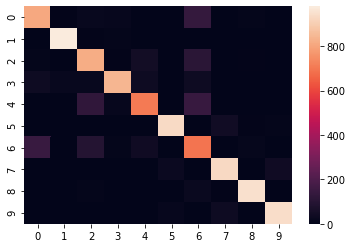

In [36]:
sns.heatmap(confusion_matrix(y_test, test_final.T))